In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
datafile_name = "Datasets\Life_Expectancy\Life Expectancy Data.csv"

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
# Import data from the csv file without index columns

df = pd.read_csv(datafile_name,index_col=False)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
print(df.isna().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [6]:
print(df.isna().any().any())


True


In [7]:
country_list =  {}
# Creating a function add country and status into a dictionary
def add_country(country, status):
    if country not in country_list:
        country_list[country] = status

for index, row in df.iterrows():
    add_country(row['Country'], row['Status'])

country_list = pd.DataFrame(list(country_list.items()), columns=['Country', 'Status'])
ountry_list = country_list.to_csv('Datasets/Life_Expectancy/country_list.csv', index=False)


In [8]:

X = df.drop(['Life expectancy ', 'Status','Country','Year'], axis=1)

X.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
df.dropna(inplace=True)


In [10]:
# Split the dataset

X = torch.tensor(df.drop(['Life expectancy ', 'Status','Country','Year'], axis=1).values, dtype=torch.float32)
y = torch.tensor(df['Life expectancy '].values, dtype=torch.float32)

X, y


(tensor([[2.6300e+02, 6.2000e+01, 1.0000e-02,  ..., 1.7300e+01, 4.7900e-01,
          1.0100e+01],
         [2.7100e+02, 6.4000e+01, 1.0000e-02,  ..., 1.7500e+01, 4.7600e-01,
          1.0000e+01],
         [2.6800e+02, 6.6000e+01, 1.0000e-02,  ..., 1.7700e+01, 4.7000e-01,
          9.9000e+00],
         ...,
         [7.3000e+01, 2.5000e+01, 4.4300e+00,  ..., 1.3000e+00, 4.2700e-01,
          1.0000e+01],
         [6.8600e+02, 2.5000e+01, 1.7200e+00,  ..., 1.7000e+00, 4.2700e-01,
          9.8000e+00],
         [6.6500e+02, 2.4000e+01, 1.6800e+00,  ..., 1.1200e+01, 4.3400e-01,
          9.8000e+00]]),
 tensor([65.0000, 59.9000, 59.9000,  ..., 44.8000, 45.3000, 46.0000]))

In [11]:
scaler = StandardScaler()

X = torch.tensor(scaler.fit_transform(X))
y = torch.tensor(scaler.fit_transform(y.reshape(-1, 1))).flatten()

In [12]:

X_train , X_test_train,y_train, y_test_train = train_test_split(X,y,test_size=0.2)
X_validation, X_test_val, y_validation, y_test_val = train_test_split(X_train, y_train, test_size = 0.2)

In [13]:
X_train = X_train.clone().detach().to(torch.float32)
X_test_train = X_test_train.clone().detach().to(torch.float32)
X_validation = X_validation.clone().detach().to(torch.float32)
X_test_val = X_test_val.clone().detach().to(torch.float32)
y_train = y_train.clone().detach().to(torch.float32)
y_test_train = y_test_train.clone().detach().to(torch.float32)
y_validation = y_validation.clone().detach().to(torch.float32)
y_test_val = y_test_val.clone().detach().to(torch.float32)


In [14]:
X_train[0]

tensor([-0.9836,  0.3265, -0.7580, -0.3970, -0.1648, -0.2202, -0.9332,  0.3671,
        -0.4262, -0.4550, -0.4244,  1.7604, -0.4805,  0.1163, -0.2503, -0.2596,
        -1.4181, -1.1880])

In [15]:
class MultilinearRegression(nn.Module):
    def __init__(self, input_size: int):
        super(MultilinearRegression, self).__init__()  # Fix the super call
        self.linear = nn.Linear(input_size, out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)

In [16]:
# Create instance
model = MultilinearRegression(X_train.shape[1])

model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0974,  0.0543, -0.0216, -0.0806,  0.2156, -0.1279,  0.2218,  0.0553,
                       -0.1494, -0.0880,  0.0034, -0.0322,  0.2225,  0.0785, -0.1369, -0.0118,
                       -0.0036,  0.1853]])),
             ('linear.bias', tensor([0.1830]))])

In [17]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [18]:
X_test_train = X_test_train.to(device)
y_test_train = y_test_train.to(device)
X_validation = X_validation.to(device)
y_validation = y_validation.to(device)
X_test_val = X_test_val.to(device)
y_test_val = y_test_val.to(device)
y_train = y_train.to(device)
X_train = X_train.to(device)
model = model.to(device)

In [19]:
epochs = 10000
losses = []
val_losses = []
for i in range(epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Clear gradients

    # Forward pass
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train.view(-1, 1))  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    losses.append(loss.item())  # Append training loss

    # Validation loss
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        y_pred_val = model(X_validation)
        val_loss = loss_fn(y_pred_val, y_validation.view(-1, 1))
        val_losses.append(val_loss.item())  # Append validation loss

    if i % 100 == 0:
        print(f"Epoch {i} -> Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")


Epoch 0 -> Training Loss: 0.5219412446022034, Validation Loss: 0.5374870300292969
Epoch 100 -> Training Loss: 0.4960598051548004, Validation Loss: 0.5101267695426941
Epoch 200 -> Training Loss: 0.47357529401779175, Validation Loss: 0.48635467886924744
Epoch 300 -> Training Loss: 0.45390939712524414, Validation Loss: 0.4655657410621643
Epoch 400 -> Training Loss: 0.4365903437137604, Validation Loss: 0.4472659230232239
Epoch 500 -> Training Loss: 0.42123308777809143, Validation Loss: 0.4310508370399475
Epoch 600 -> Training Loss: 0.40752285718917847, Validation Loss: 0.4165891706943512
Epoch 700 -> Training Loss: 0.3952018618583679, Validation Loss: 0.40360909700393677
Epoch 800 -> Training Loss: 0.3840583860874176, Validation Loss: 0.39188703894615173
Epoch 900 -> Training Loss: 0.37391868233680725, Validation Loss: 0.381238728761673
Epoch 1000 -> Training Loss: 0.3646393418312073, Validation Loss: 0.37151193618774414
Epoch 1100 -> Training Loss: 0.3561020791530609, Validation Loss: 0.3

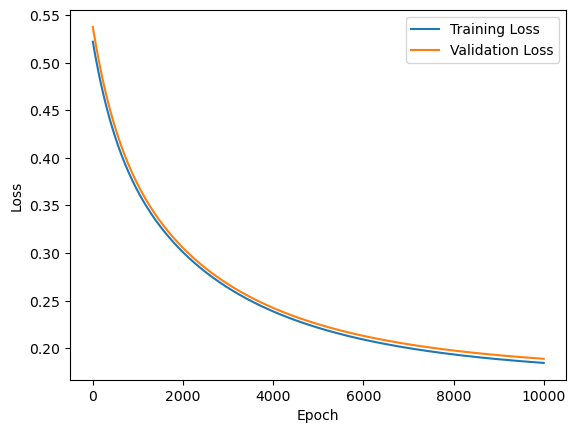

In [20]:
# Plot loss curves
plt.plot(losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Test Loss: 0.16710379719734192


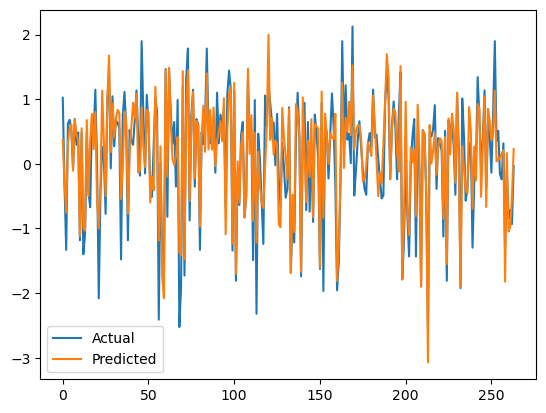

In [21]:
# Test

model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred_test = model(X_test_val)
    test_loss = loss_fn(y_pred_test, y_test_val.view(-1, 1))
    print(f"Test Loss: {test_loss.item()}")
    plt.plot(y_test_val.cpu(), label='Actual')
    plt.plot(y_pred_test.cpu(), label='Predicted')
    plt.legend()
    plt.show()
    

Test Loss: 0.16710379719734192


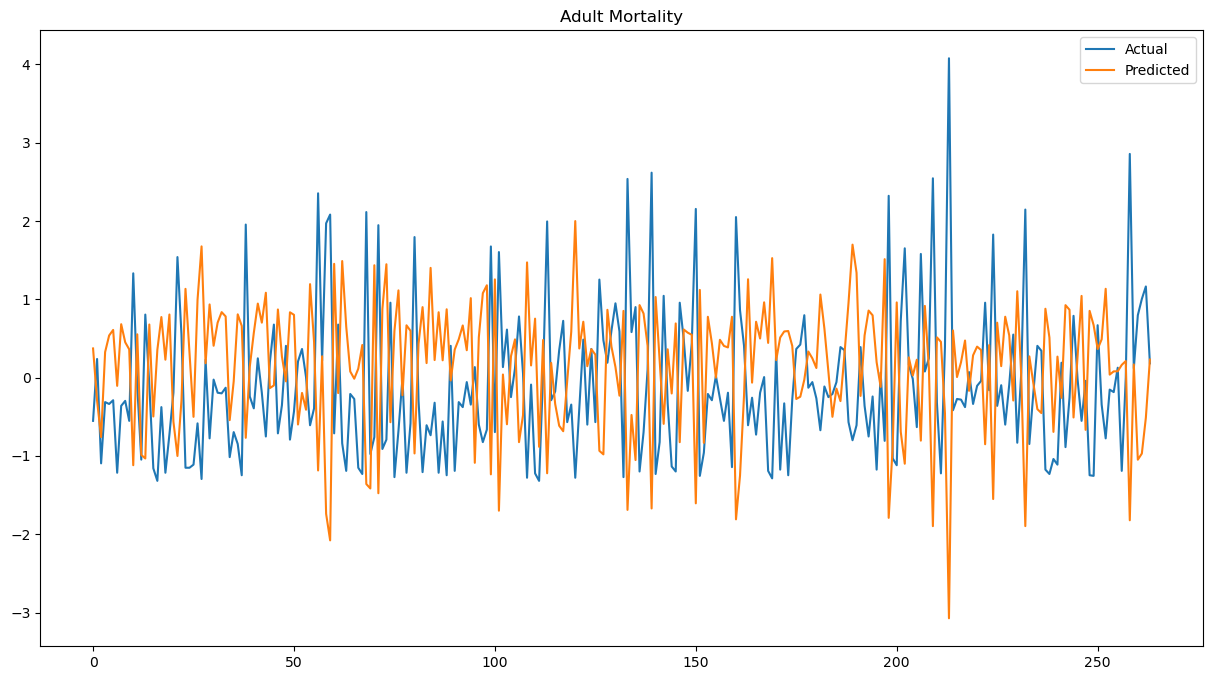

Test Loss: 0.16710379719734192


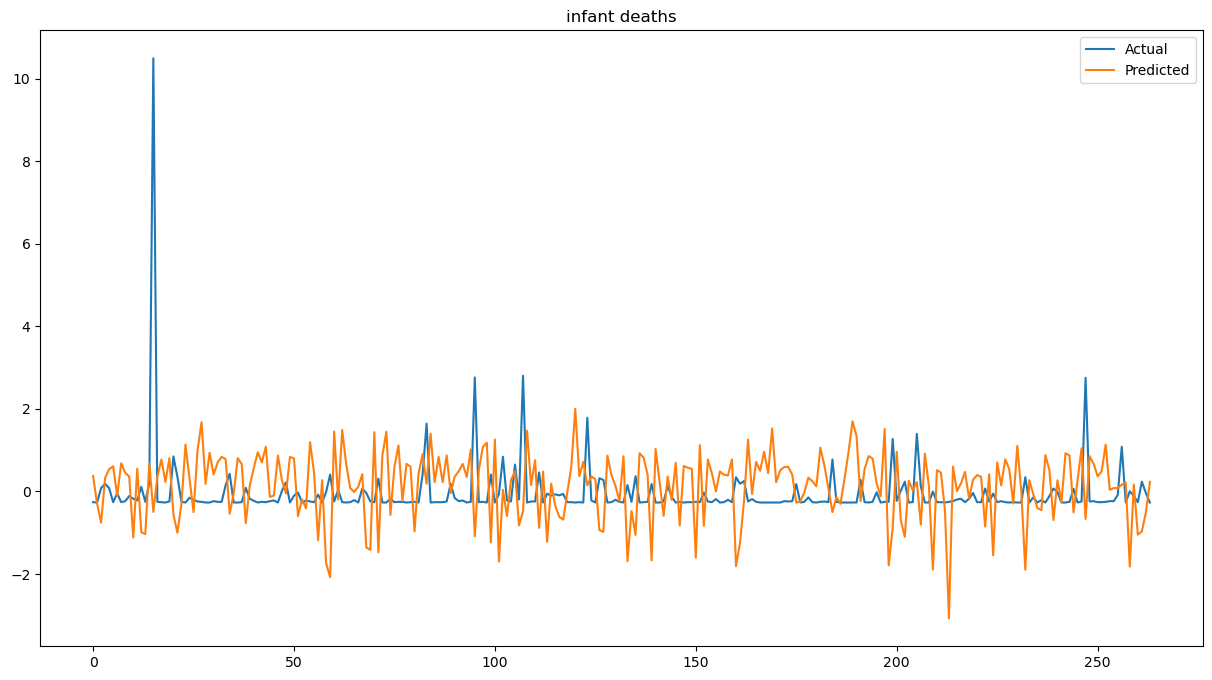

Test Loss: 0.16710379719734192


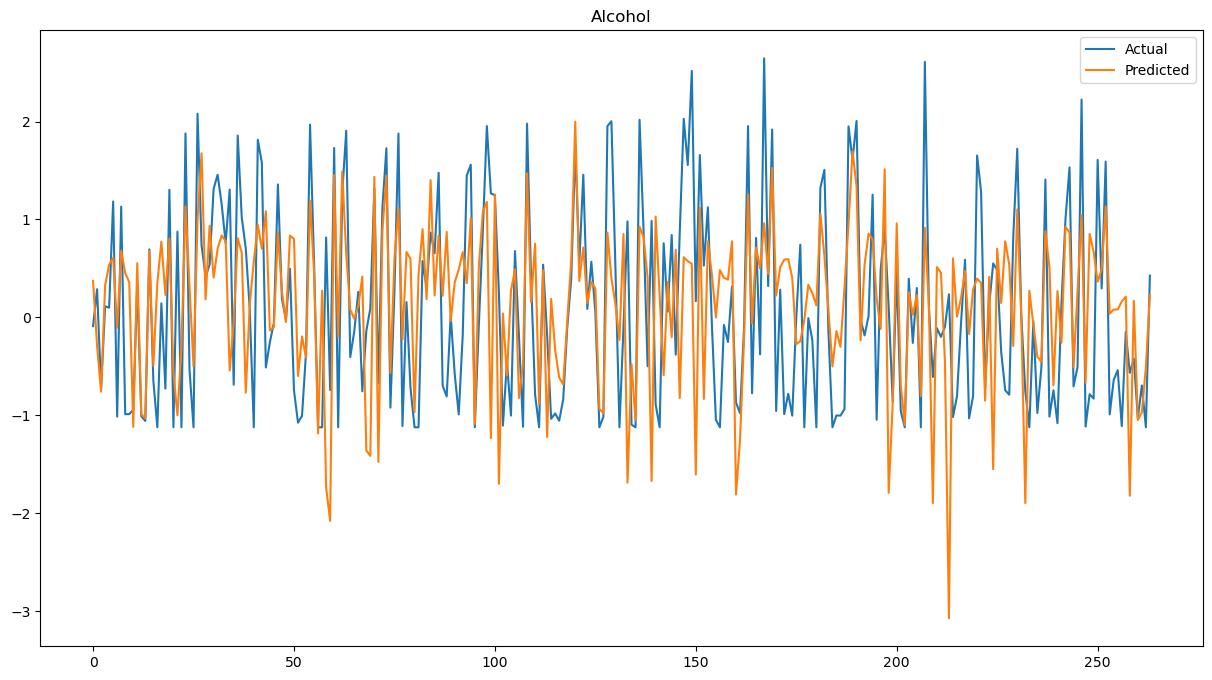

Test Loss: 0.16710379719734192


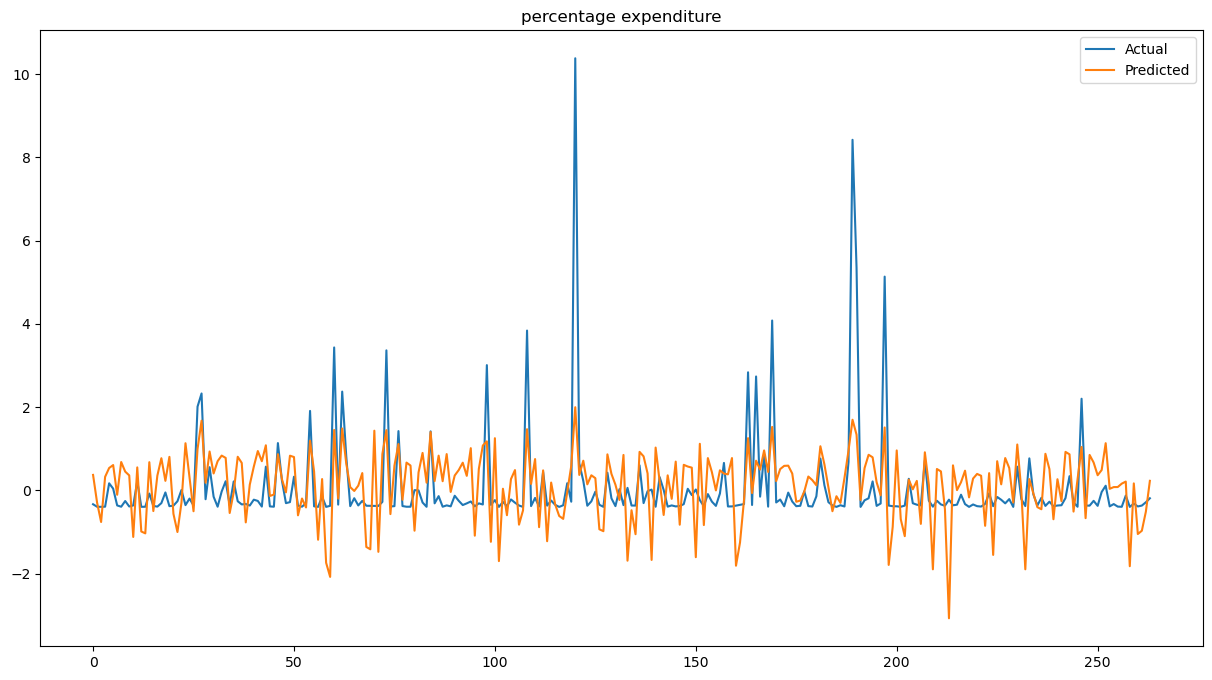

Test Loss: 0.16710379719734192


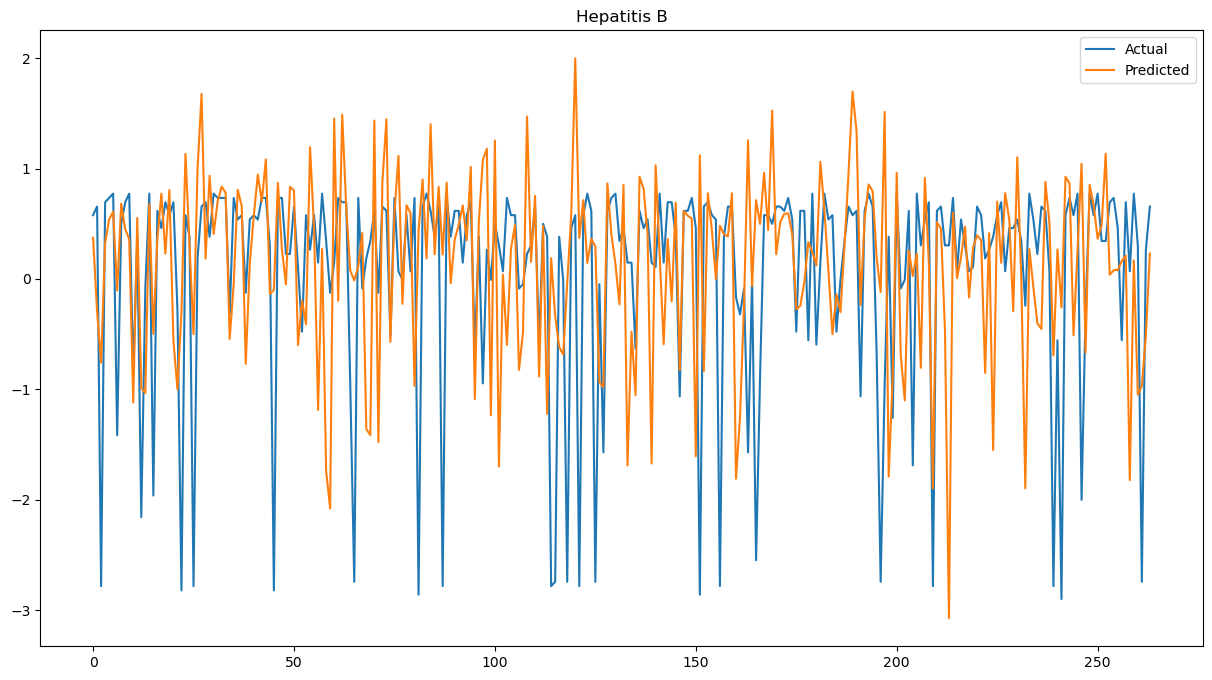

Test Loss: 0.16710379719734192


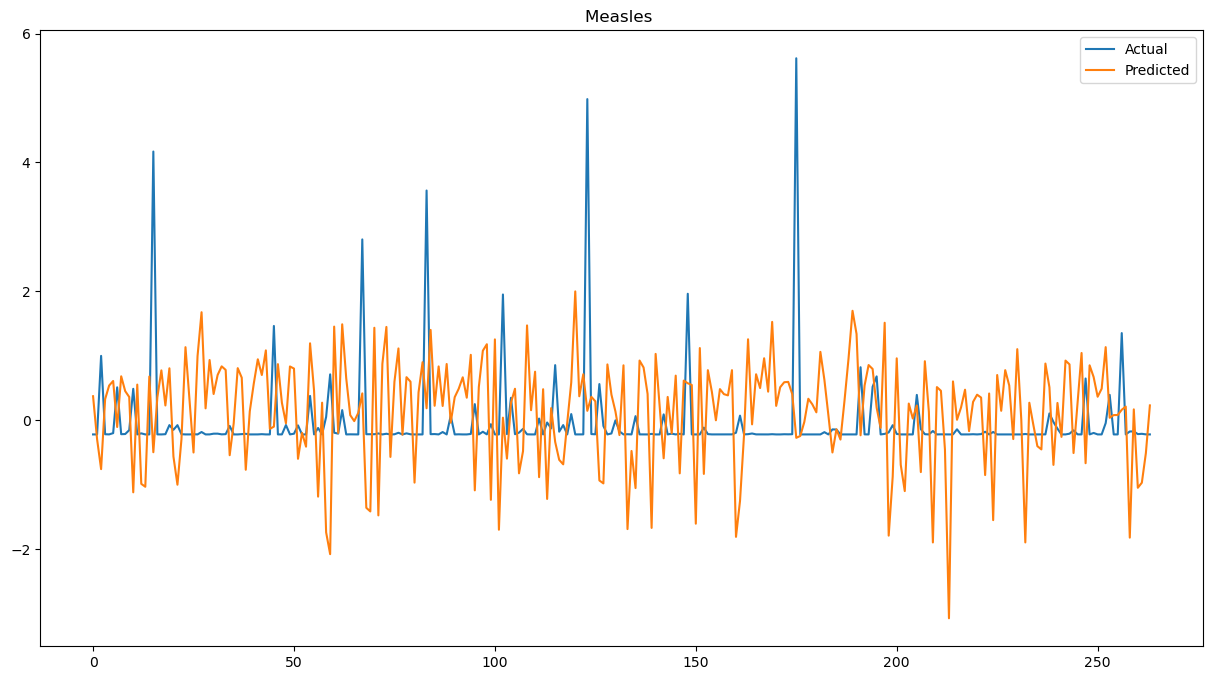

Test Loss: 0.16710379719734192


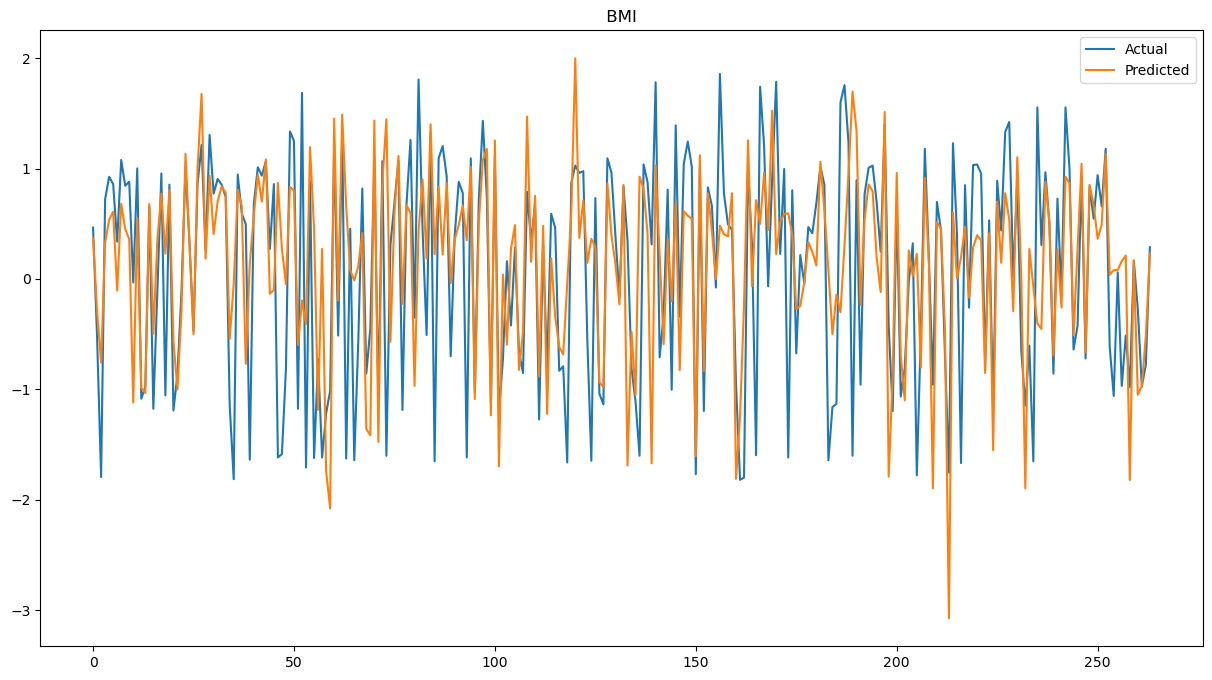

Test Loss: 0.16710379719734192


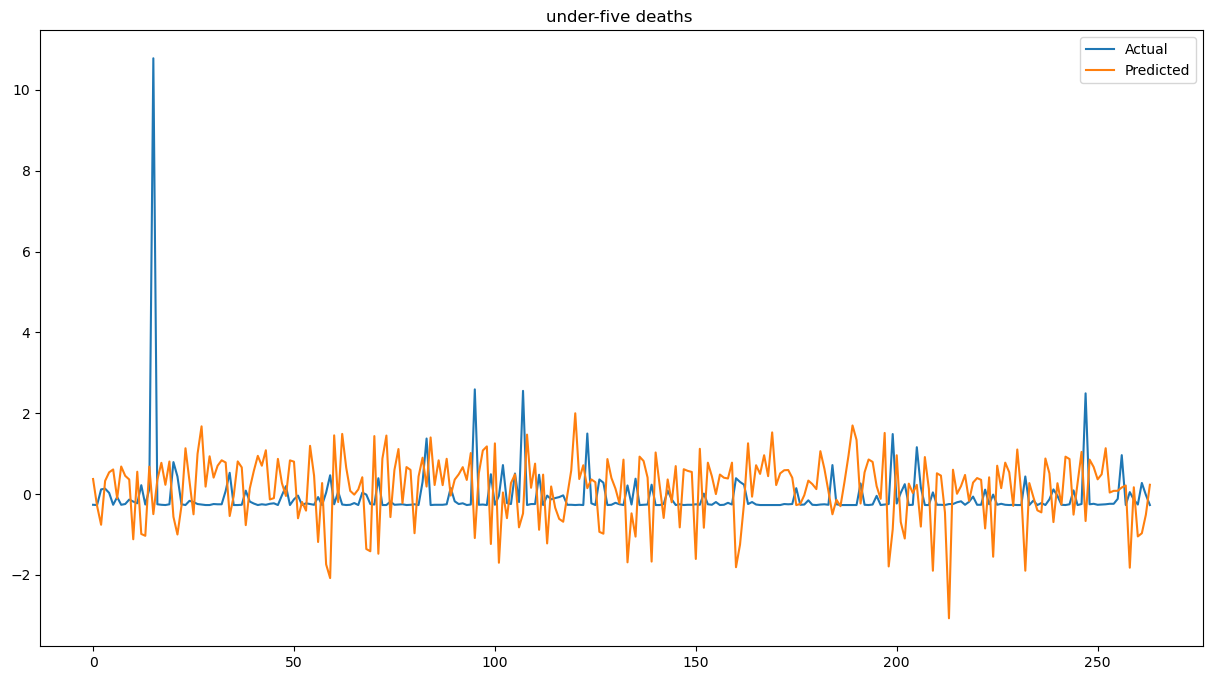

Test Loss: 0.16710379719734192


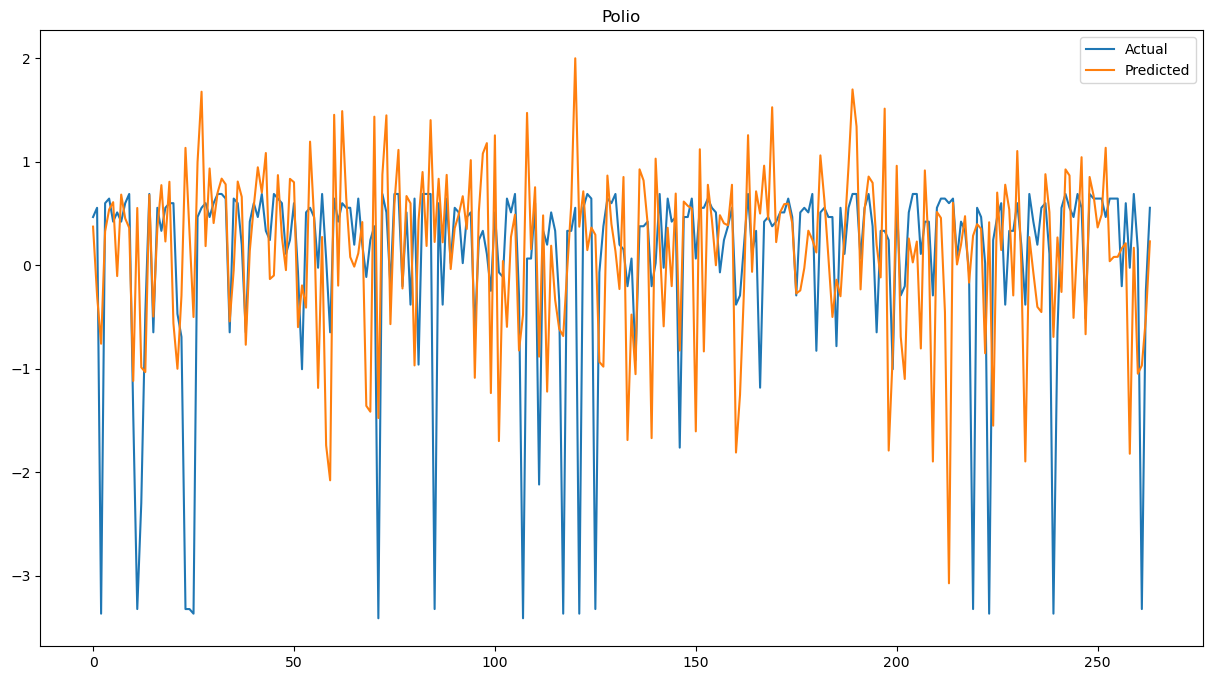

Test Loss: 0.16710379719734192


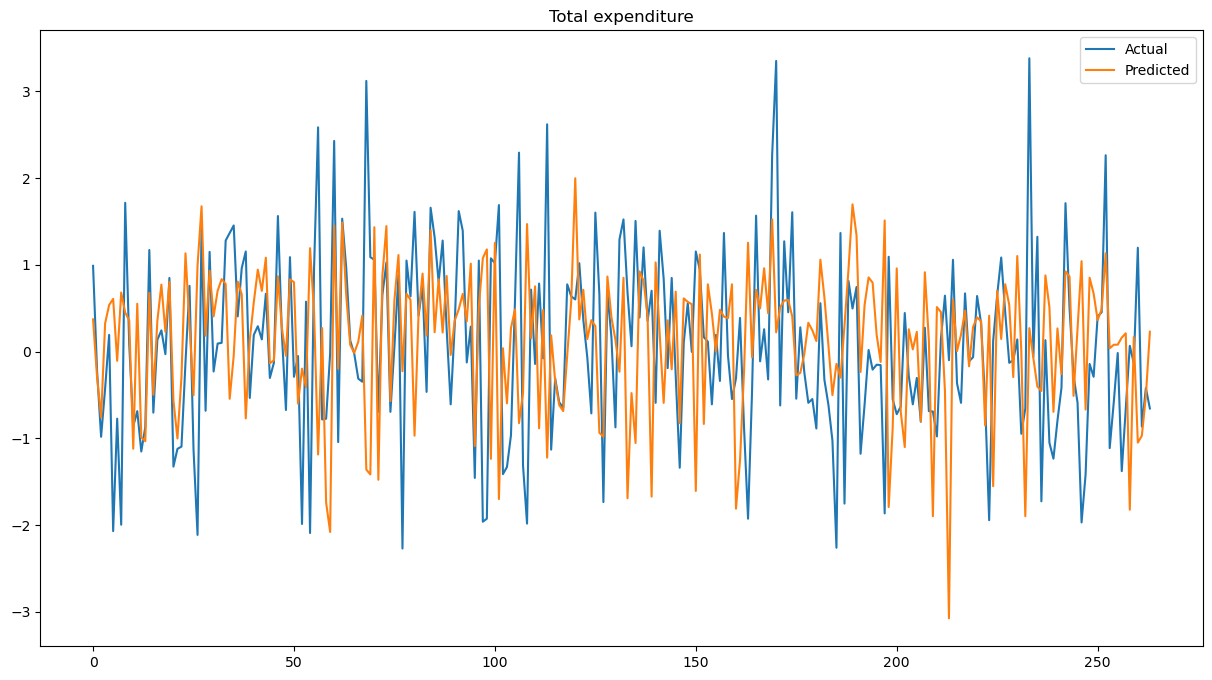

Test Loss: 0.16710379719734192


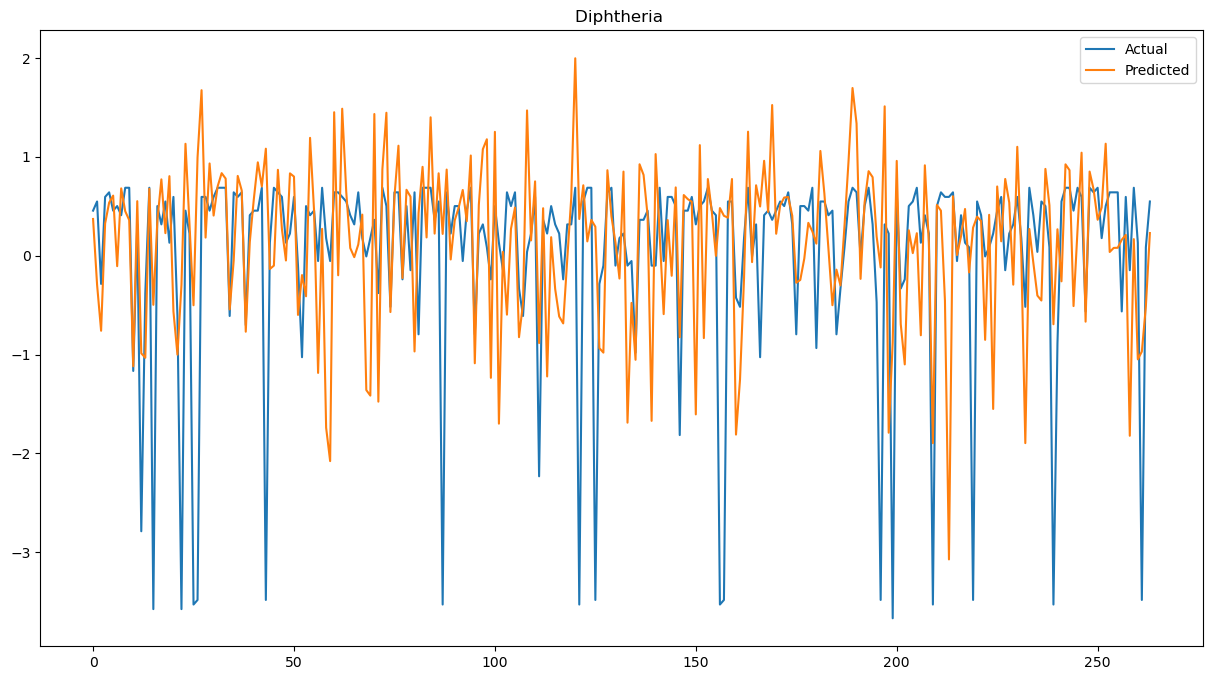

Test Loss: 0.16710379719734192


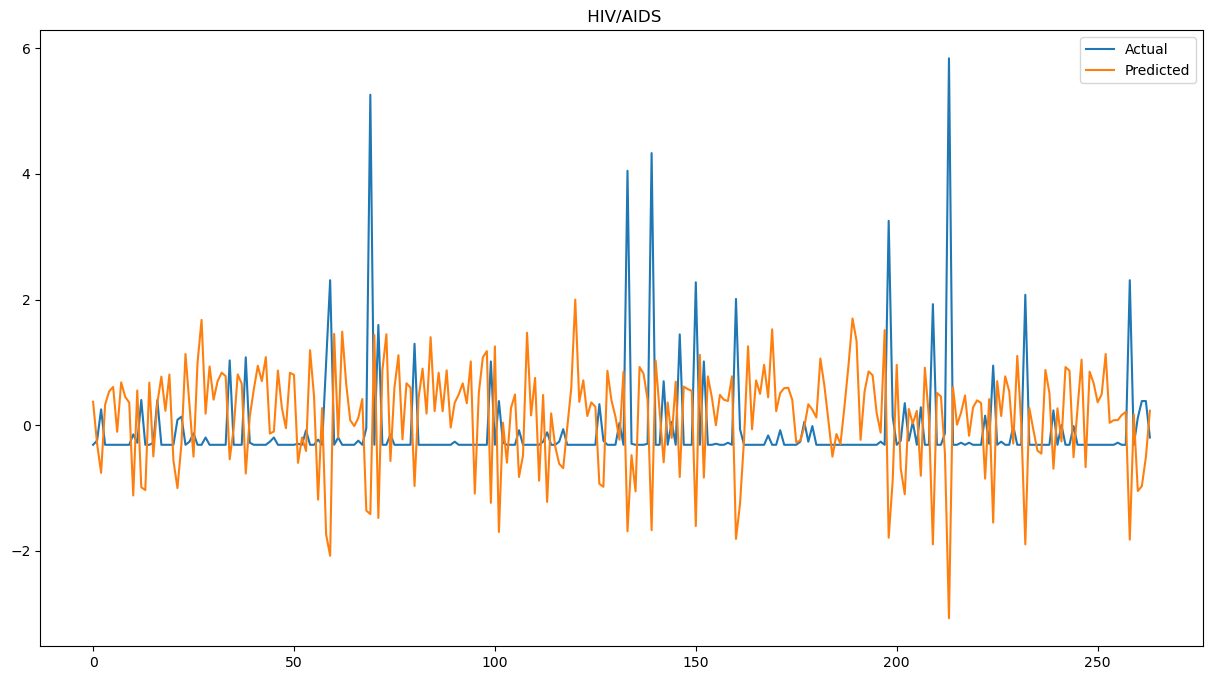

Test Loss: 0.16710379719734192


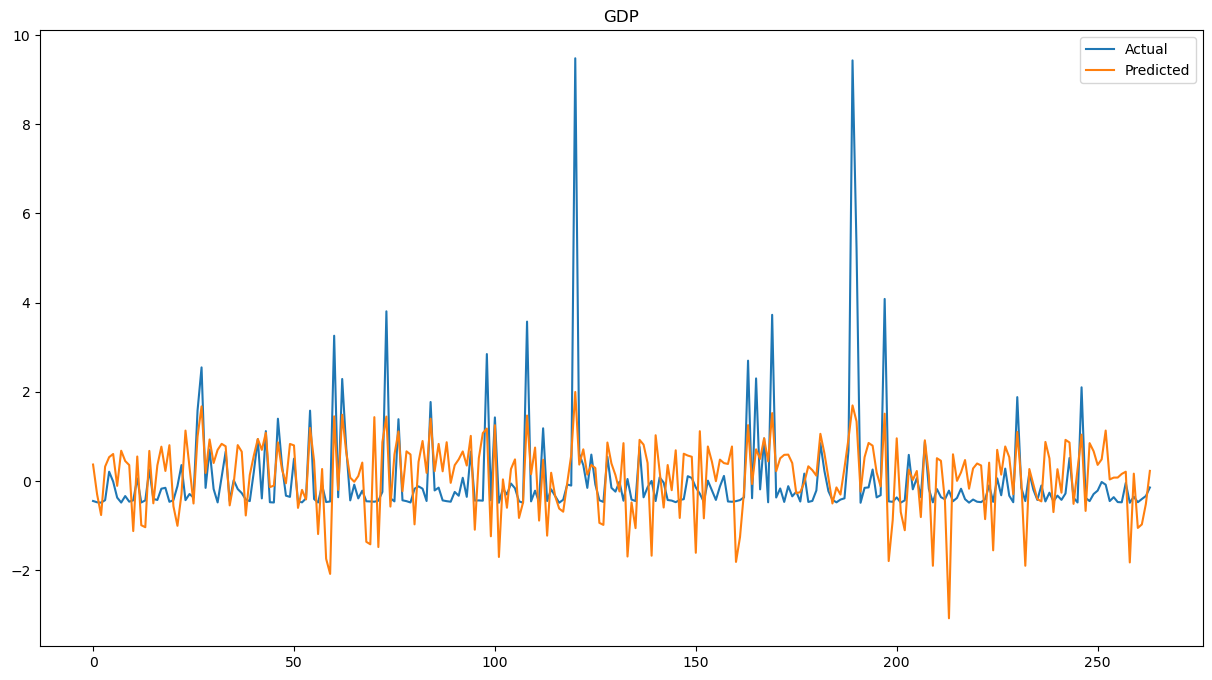

Test Loss: 0.16710379719734192


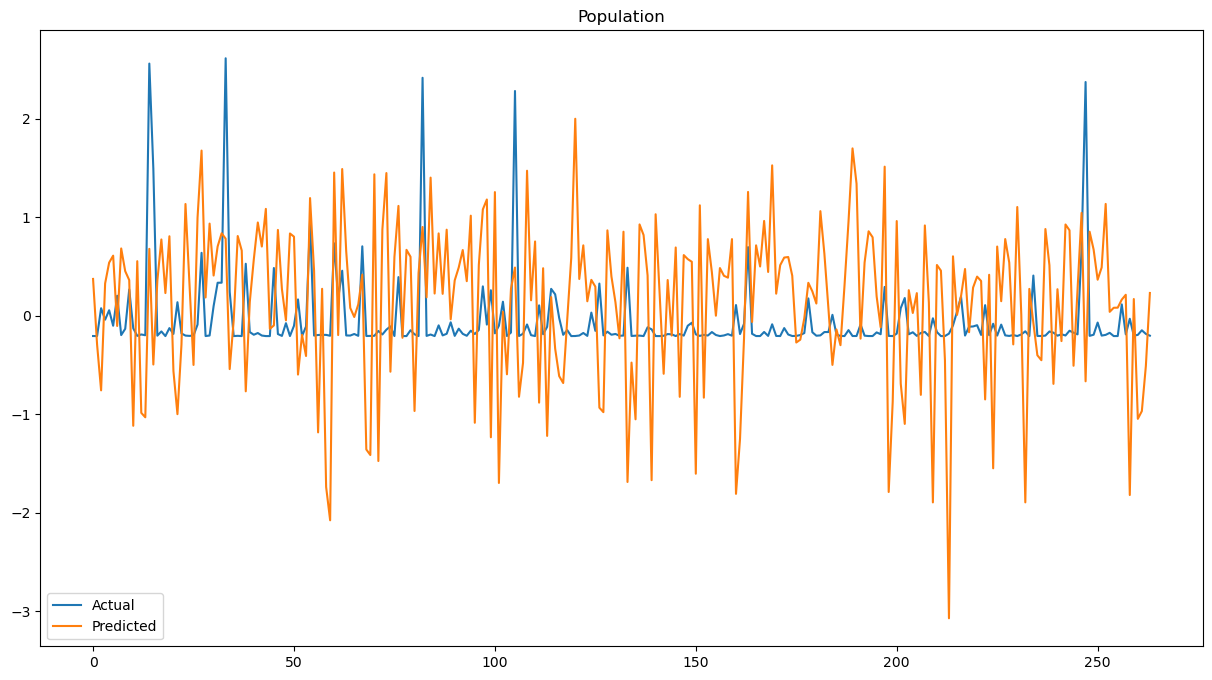

Test Loss: 0.16710379719734192


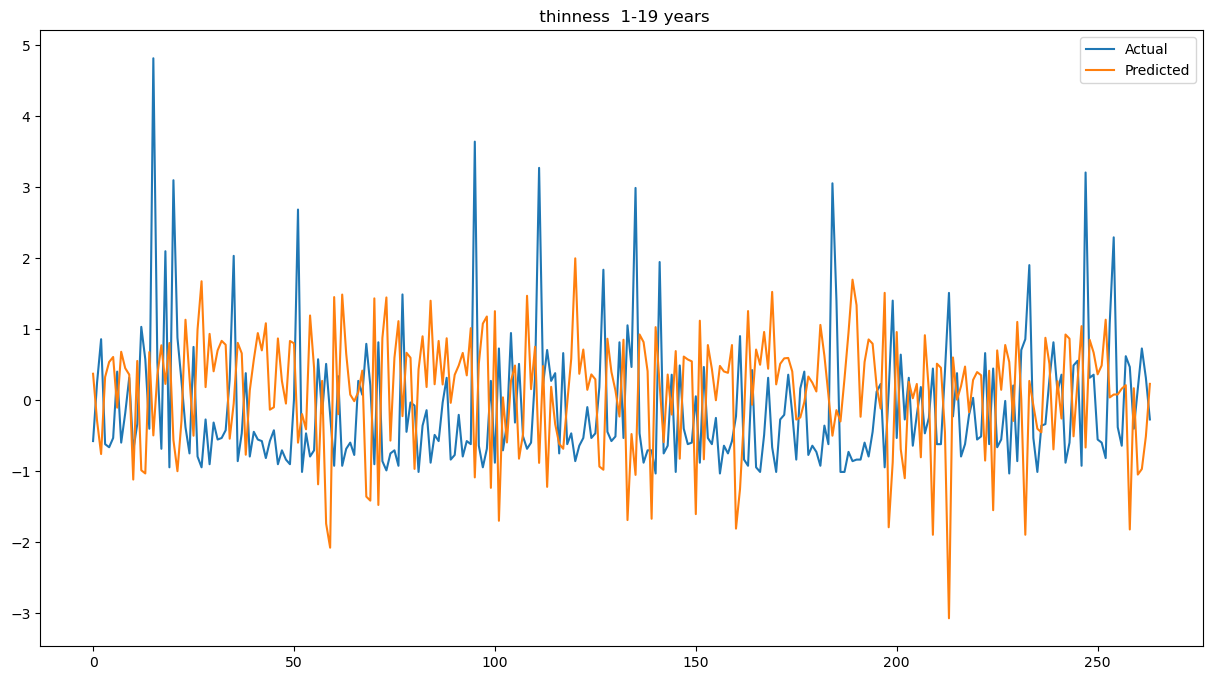

Test Loss: 0.16710379719734192


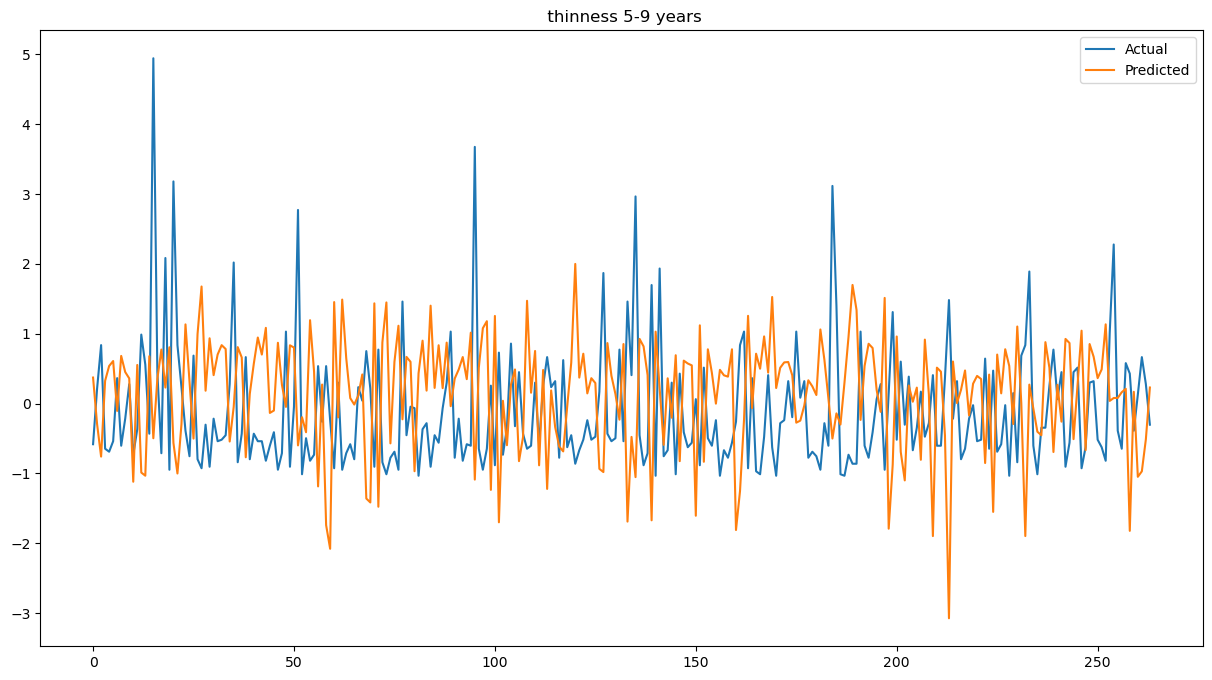

Test Loss: 0.16710379719734192


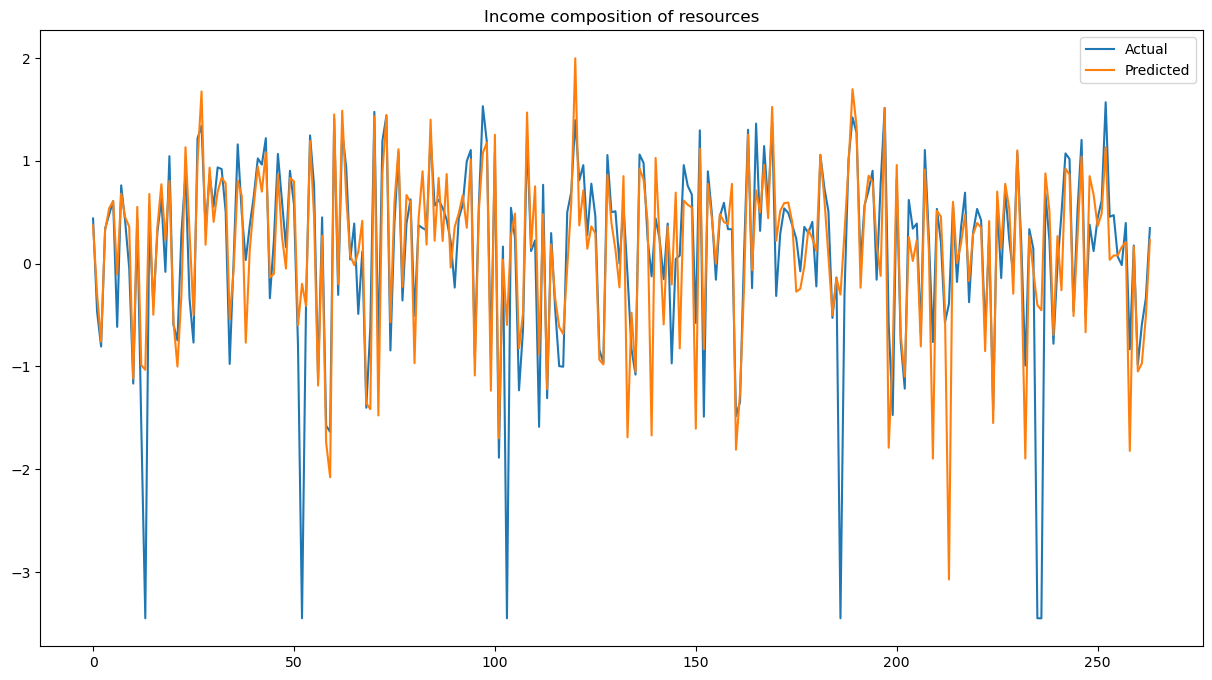

Test Loss: 0.16710379719734192


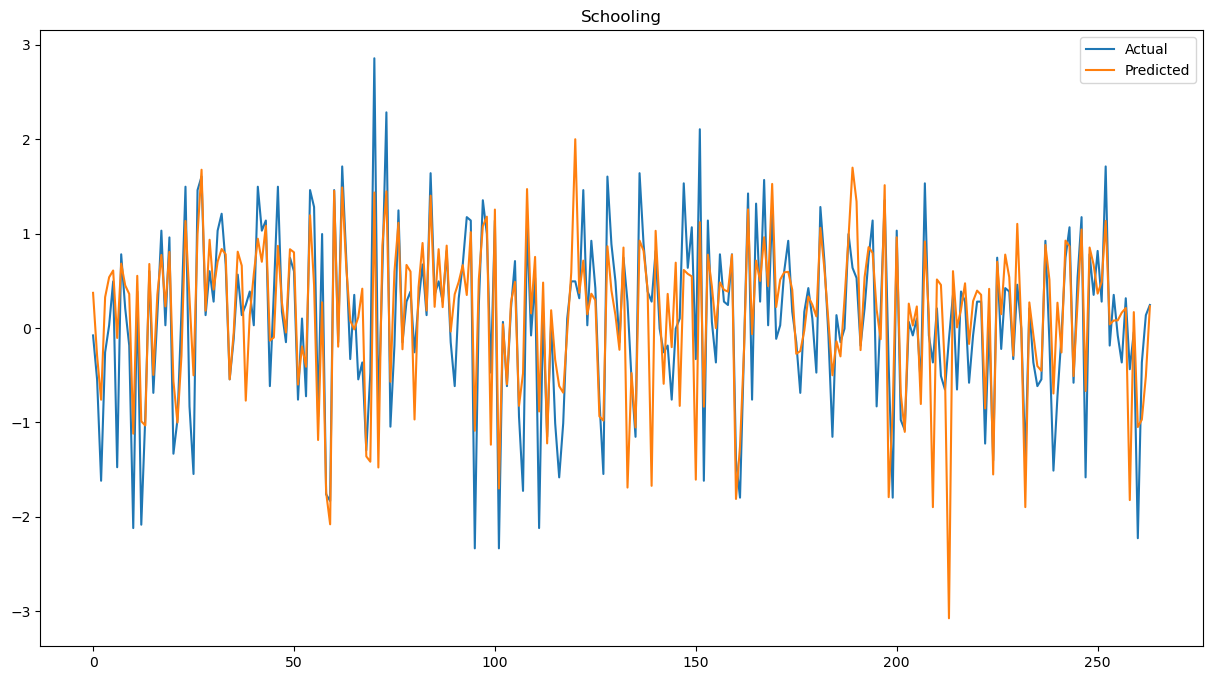

In [22]:
# Draw a graph of the actual and predicted values of each feature with name of the feature
feature_names = df.drop(['Life expectancy ', 'Status','Country','Year'], axis=1)
plt.rcParams['figure.figsize'] = [15, 8]

for i in range(0, X_test_val.shape[1]):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        y_pred_test = model(X_test_val)
        test_loss = loss_fn(y_pred_test, y_test_val.view(-1, 1))
        print(f"Test Loss: {test_loss.item()}")    
    plt.figure()
    
    plt.plot(X_test_val.cpu()[:, i], label='Actual')
    plt.plot(y_pred_test.cpu(), label='Predicted')
    plt.title(feature_names.columns[i])
    plt.legend()
    plt.show()
    
